Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q⇤(a) start out equal and then take independent random walks (say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the q⇤(a) on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, ↵ = 0.1. Use " = 0.1 and longer runs, say of 10,000 steps.

In [189]:
import numpy as np
import matplotlib.pyplot as plt

def get_reward(action):
    bandit_means = np.array([1,-2,3,1,5,2,4,-3,6,0])
    return round(np.random.normal(bandit_means[action],1),2)


print(get_reward(4))

4.22


In [223]:
def simple_bandit(limit,bandits,eps):
    Q = np.zeros(bandits)
    N = np.zeros(bandits)
    steps = range(0,limit)
    rewards = np.empty(0)
    for i in steps:
        # print('Q',end='')
        # print(Q)
        # print('N',end='')
        # print(N)
        # print('Rewards',end='')
        # print(rewards)
        rand = np.random.random()
        if rand > eps:
            A = np.argmax(Q)
        else:
            # print('random action')
            A = np.random.randint(0,bandits)
        R = get_reward(A)
        rewards = np.append(rewards,R)
        N[A] += 1
        Q[A] += 1/N[A]*(R - Q[A])

    return rewards
    # plot
    # plt.plot(steps,rewards)
    # plt.show()



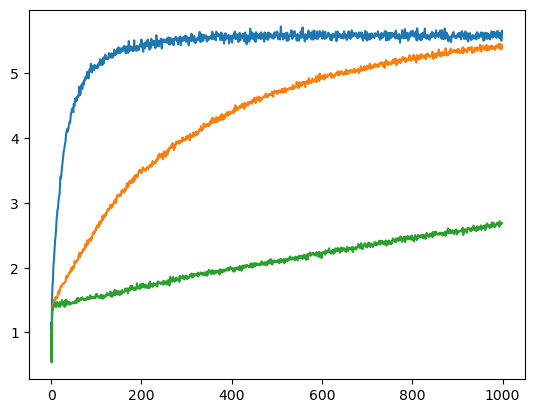

In [225]:
def average_reward(runs,step_limit,eps):
    sum_rewards = np.zeros(step_limit)
    for i in range(0,runs):
        current_rewards = simple_bandit(step_limit,9,eps) 
        sum_rewards = sum_rewards + current_rewards
    avg_r = sum_rewards/runs
    plt.plot(range(0,len(avg_r)),avg_r,label = eps)
average_reward(2000,1000,0.1)
average_reward(2000,1000,0.01)
average_reward(2000,1000,0.001)

In [209]:
simple_bandit(1000,9)

array([ 2.44,  0.63,  1.51,  1.2 ,  0.15,  0.15,  1.44, -2.52, -0.88,
        1.41,  0.82,  2.46,  0.95,  0.5 , -0.56,  0.71,  2.17, -1.06,
        0.68,  3.61,  2.22,  3.14,  1.98,  0.89,  1.85,  0.13,  1.95,
        1.15,  0.87,  2.35,  0.11,  1.95,  1.  ,  1.79,  0.65,  2.43,
        1.05, -0.59,  1.96,  1.99, -0.56,  2.  , -0.32,  1.8 ,  3.68,
        1.69,  7.06,  7.2 ,  5.73,  6.19,  6.06,  5.24,  7.4 ,  6.08,
        7.24,  7.93,  5.4 ,  5.71,  5.69,  5.48,  6.23,  6.29,  7.16,
        5.72,  5.66,  4.19,  5.65,  4.52,  8.19,  6.09,  6.7 ,  4.7 ,
        4.63,  5.61,  5.54,  6.22,  7.49,  7.34,  5.98,  6.22,  5.98,
        5.3 ,  5.46,  6.73,  5.54,  5.46,  5.71,  6.81,  5.16,  4.22,
        4.46,  6.  ,  6.33,  5.93,  5.21,  4.82,  5.54,  6.46,  3.38,
        4.86,  3.65,  4.93,  6.1 ,  6.42,  6.02,  4.54,  6.1 ,  4.48,
        6.46,  6.  ,  6.11,  6.08,  5.51,  6.24,  7.37, -2.84,  6.69,
        4.92,  5.53,  3.74,  6.33,  6.37,  4.93,  6.54,  7.02,  4.68,
        6.02,  6.67,

In [178]:
print(np.empty(0))

[]
